## Dataset:-
Here I have taken 100 images of 5 Famous Fooballers like-"Diego Maradona","Lionel Messi","Christiano Ronaldo","Mbappe","Ronaldinho" total 500 images usin Imagescrapper & divided them into 5 classes.

## Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import cv2
import pickle
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [3]:
path = os.path.join('images','Mbappe') # path of the image
sr = os.listdir(path) # image sr. no. in a list

Original Image of Mbappe
SHAPE : (162, 310, 3)


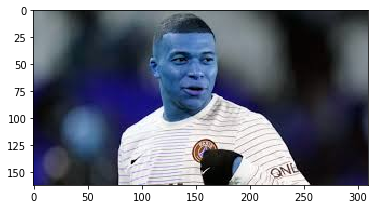

In [4]:
mbappe = cv2.imread(os.path.join(path,sr[10]))

print("Original Image of Mbappe")
print('SHAPE :',mbappe.shape)

plt.imshow(mbappe)
plt.show()

#### making data with labels

In [5]:
DATA = 'images'
CATEGORY = ["Crishtiano Ronaldo","Diego Maradona","Lionel Messi","Mbappe","Ronaldinho"]
data = []
cls = []

def training_data():
    for c in CATEGORY :
        path = os.path.join(DATA,c)
        class_num = CATEGORY.index(c)
        for img in os.listdir('/Users/user/Footballers-CNN/images/Christiano Ronaldo'):
            try:
                img_arr = cv2.imread(os.path.join(path,img))
                new_arr = cv2.resize(img_arr,(64,64))
                data.append(new_arr)
                cls.append(class_num)
                
            except Exception as e:
                pass
            
training_data()

In [6]:
X = np.array(data)
y = np.array(cls)

In [7]:
X.shape

(400, 64, 64, 3)

In [8]:
y.shape

(400,)

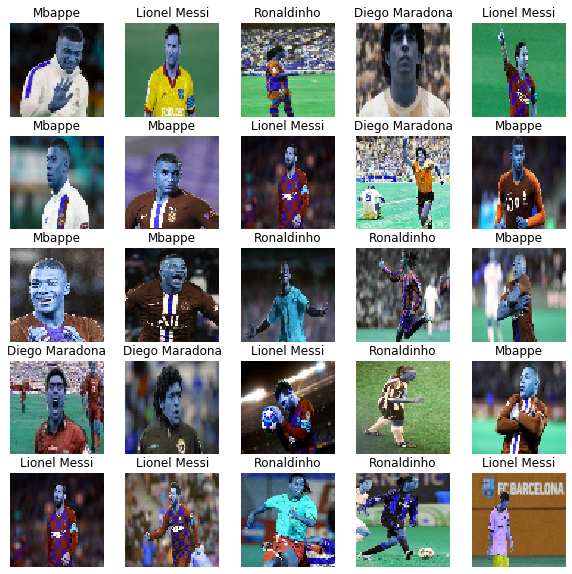

In [10]:
category={0:"Crishtiano Ronaldo",1:"Diego Maradona",2:"Lionel Messi",3:"Mbappe",4:"Ronaldinho"}

fig,axes = plt.subplots(5,5,figsize=(10,10))
for row in axes:
    for axe in row:
        indx = np.random.randint(400)
        axe.imshow(X[indx])
        axe.set_title(category[y[indx]])
        axe.set_axis_off()

Number of data sets:


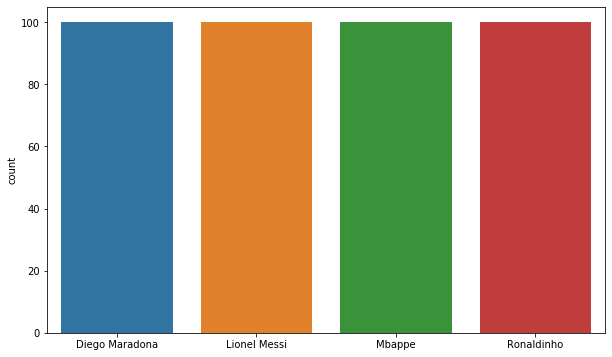

In [11]:
print('Number of data sets:')
label = []
for i in range(len(y)):
    label.append(category[y[i]])

plt.figure(figsize=(10,6))
sns.countplot(label)
plt.show()

#### Importing Libraries for CNN model

In [12]:
import keras
from keras.layers import Dense, Dropout, Activation,Conv2D, MaxPooling2D,Flatten
from keras.models import Sequential
from keras.optimizers import Adam
from keras.models import load_model
from matplotlib import pyplot
from sklearn .metrics import classification_report,confusion_matrix
import h5py

# Making CNN Model

In [13]:
X= X/255.0

In [14]:
X[0].shape

(64, 64, 3)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=42,stratify=y)

In [17]:
X_train.shape,y_train.shape

((360, 64, 64, 3), (360,))

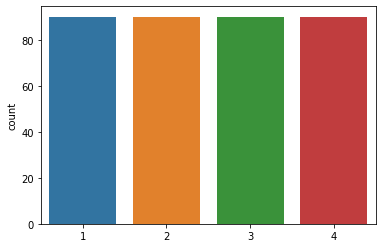

In [18]:
sns.countplot(y_train)
plt.show()

In [19]:
ytrain= keras.utils.to_categorical(y_train,num_classes=5)
ytest=keras.utils.to_categorical(y_test,num_classes=5)

In [20]:
model = Sequential()

# CNN-LAYERS
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(X[0].shape)))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 

# ANN-LAYERS
model.add(Flatten())
model.add(Dense(128, activation='relu'))

# Classification layer
model.add(Dense(5, activation='softmax'))

adam = Adam(learning_rate=0.0006,beta_1=0.9,beta_2=0.999)
model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15376)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1968256   
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 1,971,669
Trainable params: 1,971,669
Non-trainable params: 0
____________________________________________

In [22]:
hist = model.fit(X_train, ytrain,validation_data=(X_train,ytrain),batch_size=32,epochs=100,verbose=2)


Train on 360 samples, validate on 360 samples
Epoch 1/100
 - 3s - loss: 1.4267 - accuracy: 0.3333 - val_loss: 1.1704 - val_accuracy: 0.5139
Epoch 2/100
 - 2s - loss: 1.0476 - accuracy: 0.5944 - val_loss: 0.9040 - val_accuracy: 0.6694
Epoch 3/100
 - 2s - loss: 0.8508 - accuracy: 0.6917 - val_loss: 0.7178 - val_accuracy: 0.7528
Epoch 4/100
 - 2s - loss: 0.6098 - accuracy: 0.8056 - val_loss: 0.4238 - val_accuracy: 0.9222
Epoch 5/100
 - 2s - loss: 0.3640 - accuracy: 0.9306 - val_loss: 0.2579 - val_accuracy: 0.9556
Epoch 6/100
 - 2s - loss: 0.2479 - accuracy: 0.9583 - val_loss: 0.1549 - val_accuracy: 0.9778
Epoch 7/100
 - 2s - loss: 0.1379 - accuracy: 0.9833 - val_loss: 0.0971 - val_accuracy: 0.9889
Epoch 8/100
 - 2s - loss: 0.0801 - accuracy: 0.9972 - val_loss: 0.0518 - val_accuracy: 1.0000
Epoch 9/100
 - 2s - loss: 0.0460 - accuracy: 1.0000 - val_loss: 0.0328 - val_accuracy: 1.0000
Epoch 10/100
 - 2s - loss: 0.0359 - accuracy: 1.0000 - val_loss: 0.0278 - val_accuracy: 1.0000
Epoch 11/100

Epoch 81/100
 - 2s - loss: 1.3168e-04 - accuracy: 1.0000 - val_loss: 1.2908e-04 - val_accuracy: 1.0000
Epoch 82/100
 - 2s - loss: 1.2877e-04 - accuracy: 1.0000 - val_loss: 1.2586e-04 - val_accuracy: 1.0000
Epoch 83/100
 - 2s - loss: 1.2527e-04 - accuracy: 1.0000 - val_loss: 1.2232e-04 - val_accuracy: 1.0000
Epoch 84/100
 - 2s - loss: 1.2221e-04 - accuracy: 1.0000 - val_loss: 1.1930e-04 - val_accuracy: 1.0000
Epoch 85/100
 - 2s - loss: 1.2075e-04 - accuracy: 1.0000 - val_loss: 1.1673e-04 - val_accuracy: 1.0000
Epoch 86/100
 - 2s - loss: 1.1695e-04 - accuracy: 1.0000 - val_loss: 1.1450e-04 - val_accuracy: 1.0000
Epoch 87/100
 - 2s - loss: 1.1304e-04 - accuracy: 1.0000 - val_loss: 1.1063e-04 - val_accuracy: 1.0000
Epoch 88/100
 - 2s - loss: 1.1032e-04 - accuracy: 1.0000 - val_loss: 1.0746e-04 - val_accuracy: 1.0000
Epoch 89/100
 - 2s - loss: 1.0679e-04 - accuracy: 1.0000 - val_loss: 1.0472e-04 - val_accuracy: 1.0000
Epoch 90/100
 - 2s - loss: 1.0463e-04 - accuracy: 1.0000 - val_loss: 1.02

In [50]:
loss = hist.history["loss"]
accu = hist.history["accuracy"]

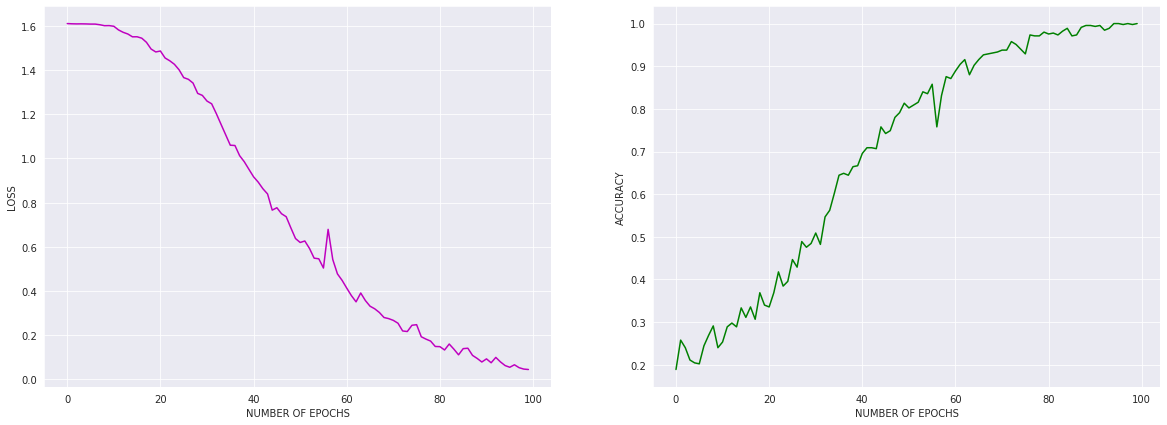

In [57]:
sns.set_style('darkgrid')
f,(ax1,ax2) = plt.subplots(1,2,figsize=(20,7))
ax1.plot(np.arange(100),loss,color='m')
ax1.set_xlabel('NUMBER OF EPOCHS')
ax1.set_ylabel('LOSS')
ax2.plot(np.arange(100),accu,color='g')
ax2.set_xlabel('NUMBER OF EPOCHS')
ax2.set_ylabel('ACCURACY')
plt.show()

In [84]:
predic =model.predict(X_test)

In [87]:
np.argmax(predic[0]),y_test[0]

(3, 3)

In [ ]:
pred=model.predict(X_train)

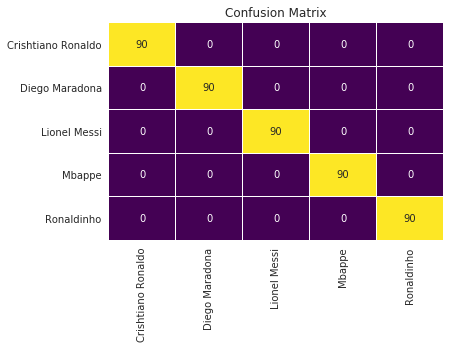

In [83]:
prd =[]
for i in range(len(pred)):
    prd.append(np.argmax(pred.round()[i]))
    
con = pd.DataFrame(confusion_matrix(y_train,prd),index=CATEGORY,columns=CATEGORY)

sns.heatmap(con,annot=True,cmap='viridis',cbar=False,linewidths=0.02)
plt.title('Confusion Matrix')
plt.show()

In [108]:
xtrain = X_train*255

Some Predicted Images


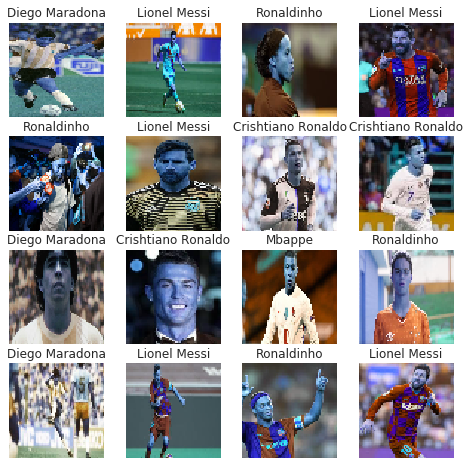

In [109]:
print('Some Predicted Images')
fig, axes = plt.subplots( 4,4,figsize = (8,8))
for row in axes:
    for j in row:
        index = np.random.randint(len(pred))
        j.imshow(xtrain[index])
        j.set_title(category[np.argmax(pred[index])])
        j.set_axis_off()
               

In [110]:
model.save('footballer_model.h5')
del model

In [15]:
model = load_model('footballer_model.h5')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 62, 62, 16)        2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 15376)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               1968256   
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 645       
Total params: 1,971,669
Trainable params: 1,971,669
Non-trainable params: 0
____________________________________________

In [24]:
category={0:"Crishtiano Ronaldo",1:"Diego Maradona",2:"Lionel Messi",3:"Mbappe",4:"Ronaldinho"}

In [27]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('images/Lionel Messi/12.jpg', target_size = (64, 64))

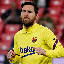

In [28]:
test_image

In [29]:
X = np.array(test_image).reshape(-1,64,64,3)
X.shape

(1, 64, 64, 3)

In [30]:
pred = model.predict(X)

In [32]:
pred

array([[0., 1., 0., 0., 0.]], dtype=float32)

In [31]:
prediction = np.argmax(pred)
cls = category[prediction]
print(cls)

Diego Maradona
